# Homework 3 - Principal Component Analysis on Neuron Spike Sorting
You should have downloaded:
- spikes.csv

The homework performs PCA, but in a setting that will feel less familiar from simpler examples seen in lecture or section. But the underlying mathematics in identical and you will get a chance to see a more "real-life" application of PCA.

## AI Assistance
We understand that we cannot stop you from using AI to help you with your homework. We also recognize that this is a skill that will be useful in the real world. With that in mind, we allow the assitence of AI on your homework. 

#### <span style="color:red">HOWEVER, you must include the prompt you used to get the answer in your submission. Additionally, you should give a brief explanation of what worked and what didn't with regard to the AI.</span>

There will be an additional cell after each question so that you can include your prompt and explanation.

Some homework assignments may also include a problem in which you are explicity asked to use AI. You must still include your prompt and explanation in the cell provided.

##### <span style="color:blue">Note: Exams are going to be on paper and proctored (i.e. without the use of AI). If you rely too heavily on AI assistance to complete your homework you may see determental effects on your exam performance.</span>

# 0 Introduction

A large amount of research in neuroscience is based on the study of the activity of neurons recorded extracellularly with microwires (very thin electrodes) implanted in animals’ brains. These microwires ‘listen’ to **a few neurons close-by** the electrode tip that fire action potentials or ‘spikes’. **Each neuron has spikes of a characteristic shape**, which is determined by a variety of factors.

Spike sorting seeks to **group spikes into clusters** based on the similarity of their shapes. Each cluster of spikes will correspond to individual neurons. Thus, we can understand neuron activity better if we can study their activity from the spikes in the data.

We will process sample neuronal voltage recordings and use Principal Component Analysis (PCA) to separate spikes.

Reference: http://www.scholarpedia.org/article/Spike_sorting

This data has been preprocesed and centered for each spike to coincide with the others. 
- There are 3298 spikes.
- Each spike contains 70 recordings representing 70 $ms$ of data. So, there are 70 features per datum.

# 1 Load and visualize data
**Task:**
1. [1 pt] Load two dimensional array `X` in which:
    - rows are the 70 voltage readings for each spike (number of features)
    - columns are observed spikes (number of data)

2. [2 pts] Display the first 5 spikes in one figure.
    - the horizontal axis would be the 70 recordings, in $ms$.
    - the vertical axis would be the voltage, in $mV$.
    - Include axis labels and a title

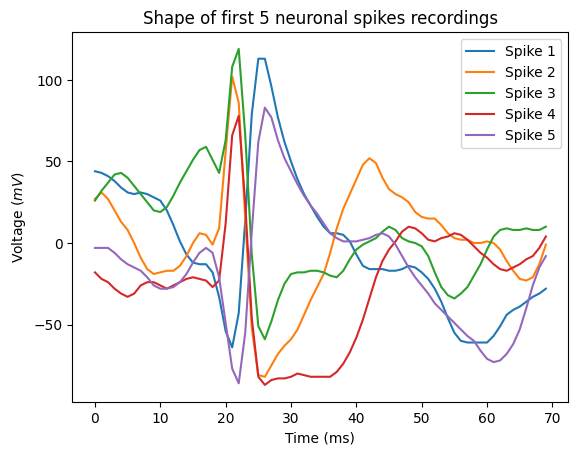

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# TODO load data 
X = pd.read_csv("spikes.csv", header = None).to_numpy()
n, m = X.shape

# TODO plot the first 5 spikes
for i in range(5):
    plt.plot(X[:, i], label=f'Spike {i+1}')
    
plt.xlabel(r'Time (ms)')
plt.ylabel(r'Voltage ($mV$)')
plt.title('Shape of first 5 neuronal spikes recordings')
plt.legend()
plt.show()

### 1 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

# 2 Manual PCA

We are interested in correlating ''spikes in the waveform'' to ''the activity of neurons''. 

The difficulty arrises from the fact that observed spikes can arise from the different neurons that are firing in the neighborhood of microwire (detector). Interactions (''correlation'') between spikes from different neuronal population can siginificantly change the voltage recording shape. For example, the peak of action potential from neuronal acticivity from one cell can be reduced if it concides with the dip of action potential from another cell firing. 

Historically, PCA has been proposed as a method to seperate spikes into clusters of neuronal activity. Let's try it ourselves.

## 2.1 Eigen Problem
**Task:** 
1. [2 pts] Center data by subtracting the mean, store it as `X_ctd`. 
2. [2 pts] Compute the unbiased covariance matrix.
3. [2 pts] Use `np.linalg.eigh()` to get the eigenvalues and eigenvectors of the covariance matrix. 

In [36]:
# TODO center data
X_ctd = X - X.mean(axis=1, keepdims=True)

# TODO covariance matrix
cov_mat = (1 / (n-1)) * (X @ X.T)
print("The shape of the covariance matrix is,", cov_mat.shape) # What should be the shape of the covariance matrix?

# TODO compute eigenvalues and eigenvectors
evals, evecs = np.linalg.eigh(cov_mat)

# np.linalg.eigh() returns eigenvalues in the ascending order. Reverse the eigenvalues and eigenvectors to get descending order
evals = evals[::-1]
evecs = evecs[:, ::-1]

The shape of the covariance matrix is, (70, 70)


### 2.1 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 2.2 Scree plot
A Scree Plot in PCA is a graph showing the variance explained by each principal component.
- X-axis: Principal component number (PC1, PC2, ...)
- Y-axis: Variance explained, eigenvalue or percentage of variance
- Purpose: Helps decide how many components to keep. Usually, the curve drops significantly after a few components.

**Task:**

[2 pts] Make a scree plot of the percentage of variance of the covariance matrix.

In [50]:
var_explained = evals / evals.sum()
var_explained

array([4.99250818e-01, 1.65717231e-01, 8.49871108e-02, 6.02517854e-02,
       5.24178389e-02, 2.90217521e-02, 2.21443325e-02, 2.05216581e-02,
       1.45792048e-02, 1.13350925e-02, 9.13608417e-03, 6.46359403e-03,
       5.54299342e-03, 4.24915244e-03, 3.05533191e-03, 2.72369012e-03,
       1.89655914e-03, 1.15037408e-03, 1.09128888e-03, 8.04023785e-04,
       5.70467305e-04, 5.34299117e-04, 3.96091755e-04, 3.73660635e-04,
       3.24581860e-04, 3.00442987e-04, 2.42892557e-04, 2.14019461e-04,
       1.73253416e-04, 1.38736324e-04, 1.03911536e-04, 7.99180066e-05,
       5.74353661e-05, 4.07444642e-05, 2.92007747e-05, 2.02549278e-05,
       1.31206694e-05, 9.17305691e-06, 6.23765351e-06, 5.05408434e-06,
       3.17514645e-06, 2.49288985e-06, 1.63423614e-06, 1.37067882e-06,
       1.15337492e-06, 1.07685715e-06, 9.22247064e-07, 7.91321584e-07,
       7.61465351e-07, 7.31185581e-07, 7.19950236e-07, 6.97422535e-07,
       6.90440310e-07, 6.70827044e-07, 6.68638929e-07, 6.56606899e-07,
      

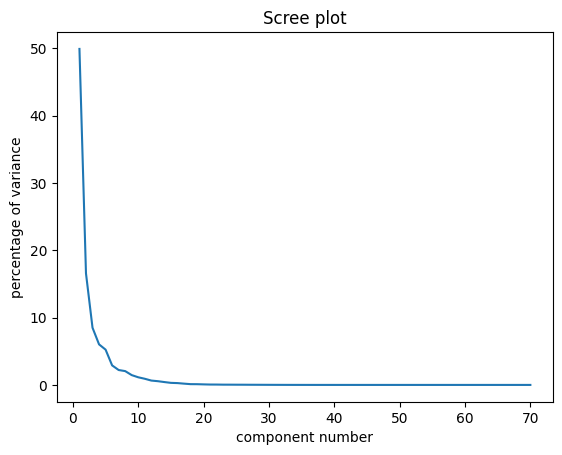

In [52]:
# TODO plot

var_explained = evals / evals.sum()
var_explained *= 100

pc = np.arange(1, n + 1, 1)
plt.plot(pc, var_explained)

plt.title('Scree plot')
plt.xlabel('component number'); plt.ylabel('percentage of variance')
plt.show()

### 2.2 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 2.3 Projection
In the raw data set, a data point has 70 feature. Using PCA, we could significantly reduce dimension by projecting the data on a few important components. Recall the magnitude of a column vector $x$ on the direction of $u$ (also a column vector) is $u^Tx$. If we have multiple data points and directions, forming matrix $X$ and $U$, we could write the formula in the matrix form,
$$
    X_{proj}=U^TX.
$$
A column of $X_{proj}$ represents the new coordinates of a data point.

**Task:**

[2 pts] Compute the projection coordinates with 2 principal components.

In [68]:
# TODO compute X_proj
U = evecs[:,:2]
X_proj = U.T @ X

In `X_proj`, each data is represented by 2 coordinates, which could be plotted on a plane. Geometrically, this is the projection of the data onto the plane spanned by `evecs[:, 0]` and `evecs[:, 1]`.

**Task:**

2. [2 pts] Make a scatter plot of `X_proj`. Make sure the x-axis represents the magnitude on PC1 and y-axis represents the magnitude on PC2.

In [71]:
X_proj.shape

(2, 3298)

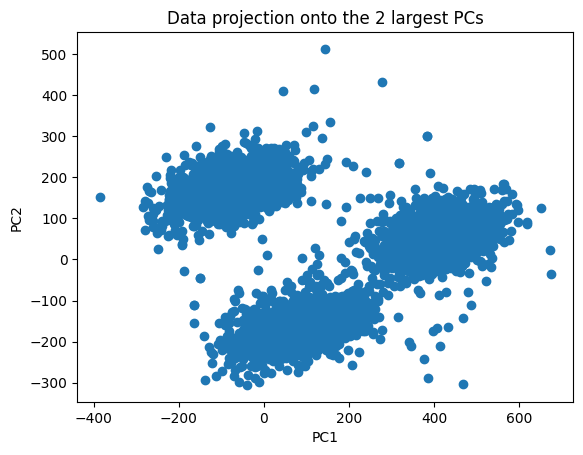

In [73]:
# TODO scatter

plt.scatter(X_proj[0,:], X_proj[1,:])

plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('Data projection onto the 2 largest PCs')
plt.show()

### 2.3 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 2.4 Reconstruction of Signals
Now we want to reconstruct the neuron spike data from the projection. Recall the matrix form of reconstruction is just
$$
    \hat{X}=UX_{proj}=UU^TX.
$$
**Task:**
1. [2 pts] Reconstruct all the signal with 2, 5, 10 and 70 PCs.
2. [2 pts] Plot the reconstruction of the first data in one figure with dash line. Please label the plots properly.

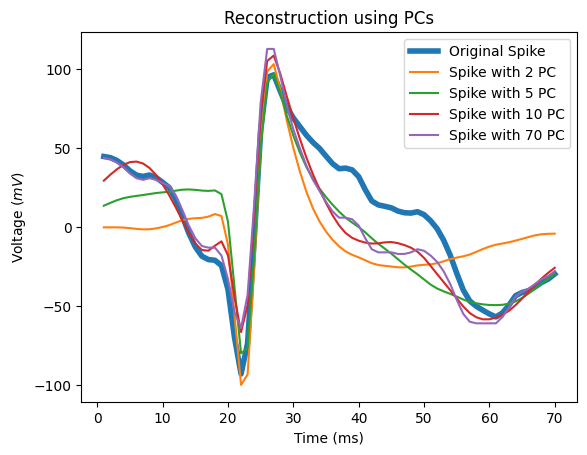

In [77]:
# plot the spike before reconstruction
plt.plot(np.arange(n) + 1, X_ctd[:, 0], label=f'Original Spike', linewidth=4)

for k in [2, 5, 10, 70]:
    # TODO reconstruction
    U = evecs[:,:k]
    X_hat = U @ U.T @ X
    
    # TODO Plot the reconstruction of the first spike with k PC
    plt.plot(np.arange(n) + 1, X_hat[:,0], label=f'Spike with {k} PC')
    

plt.xlabel(r'Time (ms)')
plt.ylabel(r'Voltage ($mV$)')
plt.legend()
plt.title('Reconstruction using PCs')
plt.show()

### 2.4 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

# 3 Sklearn PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
In sklearn, class `PCA` in `sklearn.decomposition` can help to deal with the principal component analysis. It will **automatically centralize the data** and do the singular value decomposition. However, different from manual implementation, in `PCA`, each row of the data matrix is a data point and a column is a feature. You will need to transpose your data matrix when using sklearn here. The projection and reconstruction results given by the package function is also oriented differently from our manual implementation.


## 3.1 Data Projection
**Task:** 
1. [1 pt] Fit a PCA object with data. Consider only the largest 3 PCs.
2. [2 pts] Use the object to project the data and store it in `X_proj_sklearn`.
3. [2 pts] The components, or the eigenvectors, share the same number of feature with the data. Plot the first two PCs in the same way as we plot the data.

Through this exercise, we should gain familiarity with the package.

/tmp/ipykernel_3506/3221904061.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


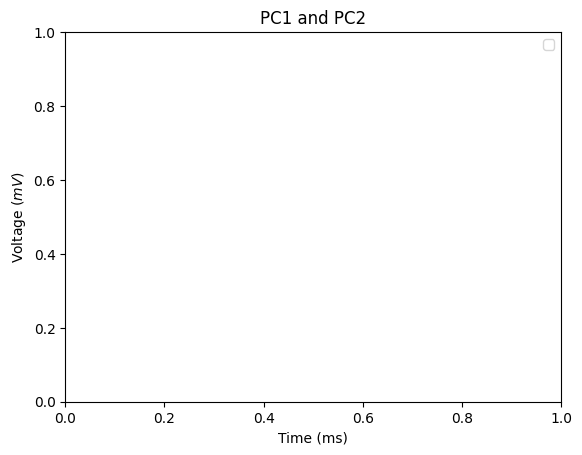

In [79]:
# TODO initiate object
pca = PCA(n_components=3)

# TODO project the data
X_proj_sklearn = pca.fit(X.T)

# TODO plot components 1 & 2

plt.legend()
plt.xlabel(r'Time (ms)')
plt.ylabel(r'Voltage ($mV$)')
plt.title('PC1 and PC2')
plt.show()

### 3.1 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

## 3.2 Signal Reconstruction
Sklearn can also do the reconstruction. Please use the documentation (in the link) to find the function for reconstructing signals.

**Task:**
1. [2 pts] Reconstruct the signals with 5 PCs using package function and store the result in `X_hat_sklearn`.
2. [2 pts] Plot the reconstruction of the first spike with dash line as before. Please label the plot properly

This time, you should have 2 plots in the same figure:
1. original spike
2. Approximate reconstruction with 5 PCs

In [ ]:
# TODO reconstruction using package functino
X_hat_sklearn = None


plt.plot(np.arange(n) + 1, X_ctd[:, 0], label=f'Original Spike', linewidth=4)
# TODO plot the reconstruction


plt.xlabel(r'Time (ms)')
plt.ylabel(r'Voltage ($mV$)')
plt.legend()
plt.title('Reconstruction using 5 PCs')
plt.show()

### 3.2 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made:

# 4 Discuss
**Task:**

[2 pts] In PCA, one key step is deciding how many components to keep. How should we decide the number of components to retain in PCA?

**Ans:**


### 4 AI Analysis (if used)

#### Prompt(s):

#### Explanation / Changes made: